In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/sleeping-alone-data/sleeping-alone-data.csv')
df = pd.read_csv('../assets/datasets/sleeping-alone-data.csv')

In [3]:
df.columns

Index([u'StartDate', u'EndDate',
       u'Which of the following best describes your current relationship status?',
       u'How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.',
       u'When both you and your partner are at home, how often do you sleep in separate beds?',
       u'When you're not sleeping in the same bed as your partner, where do you typically sleep?',
       u'Unnamed: 6',
       u'When you're not sleeping in the same bed, where does your partner typically sleep?',
       u'Unnamed: 8',
       u'What are the reasons that you sleep in separate beds? Please select all that apply.',
       u'Unnamed: 10', u'Unnamed: 11', u'Unnamed: 12', u'Unnamed: 13',
       u'Unnamed: 14', u'Unnamed: 15', u'Unnamed: 16', u'Unnamed: 17',
       u'Unnamed: 18', u'Unnamed: 19',
       u'When was the first time you slept in separate beds?',
       u'To what extent do you agree with the followi

In [4]:
df.head()

,StartDate,EndDate,Which of the following best describes your current relationship status?,"How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.","When both you and your partner are at home, how often do you sleep in separate beds?","When you're not sleeping in the same bed as your partner, where do you typically sleep?",Unnamed: 6,"When you're not sleeping in the same bed, where does your partner typically sleep?",Unnamed: 8,What are the reasons that you sleep in separate beds? Please select all that apply.,...,"To what extent do you agree with the following statement: ""sleeping in separate beds helps us to stay together.""","To what extent do you agree with the following statement: ""we sleep better when we sleep in separate beds.""","To what extent do you agree with the following statement:�_""our sex life has improved as a result of sleeping in separate beds.""�_",Which of the following best describes your current occupation?,Unnamed: 25,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,Response,Response,Response,Response,Other (please specify),Response,Other (please specify),One of us snores,...,Response,Response,Response,Response,Other (please specify),Response,Response,Response,Response,Response
1,7/10/14 18:37,7/10/14 18:39,"Single, but cohabiting with a significant other",1-5 years,Once a year or less,On the couch/chair,NaN,"My partner sleeps in our shared bed, I'm the o...",NaN,NaN,...,Strongly disagree,Somewhat agree,Strongly disagree,Other (please specify),Student,Male,18-29,"$0 - $24,999",Some college or Associate degree,Pacific
2,7/10/14 15:54,7/10/14 15:56,"Single, but cohabiting with a significant other",1-5 years,A few times per month,"I sleep in our shared bed, my partner is the o...",NaN,Separate bedroom,NaN,One of us snores,...,Somewhat agree,Strongly agree,Strongly disagree,Healthcare Support Occupations,NaN,Male,18-29,NaN,Bachelor degree,South Atlantic
3,7/10/14 15:44,7/10/14 15:49,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Legal Occupations,NaN,Male,18-29,"$150,000+",Graduate degree,South Atlantic
4,7/10/14 13:47,7/10/14 13:47,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"Life, Physical, and Social Science Occupations",NaN,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic


In [5]:
responses = df.iloc[0]
df = df.iloc[1:]
df.head()

,StartDate,EndDate,Which of the following best describes your current relationship status?,"How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.","When both you and your partner are at home, how often do you sleep in separate beds?","When you're not sleeping in the same bed as your partner, where do you typically sleep?",Unnamed: 6,"When you're not sleeping in the same bed, where does your partner typically sleep?",Unnamed: 8,What are the reasons that you sleep in separate beds? Please select all that apply.,...,"To what extent do you agree with the following statement: ""sleeping in separate beds helps us to stay together.""","To what extent do you agree with the following statement: ""we sleep better when we sleep in separate beds.""","To what extent do you agree with the following statement:�_""our sex life has improved as a result of sleeping in separate beds.""�_",Which of the following best describes your current occupation?,Unnamed: 25,Gender,Age,Household Income,Education,Location (Census Region)
1,7/10/14 18:37,7/10/14 18:39,"Single, but cohabiting with a significant other",1-5 years,Once a year or less,On the couch/chair,NaN,"My partner sleeps in our shared bed, I'm the o...",NaN,NaN,...,Strongly disagree,Somewhat agree,Strongly disagree,Other (please specify),Student,Male,18-29,"$0 - $24,999",Some college or Associate degree,Pacific
2,7/10/14 15:54,7/10/14 15:56,"Single, but cohabiting with a significant other",1-5 years,A few times per month,"I sleep in our shared bed, my partner is the o...",NaN,Separate bedroom,NaN,One of us snores,...,Somewhat agree,Strongly agree,Strongly disagree,Healthcare Support Occupations,NaN,Male,18-29,NaN,Bachelor degree,South Atlantic
3,7/10/14 15:44,7/10/14 15:49,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Legal Occupations,NaN,Male,18-29,"$150,000+",Graduate degree,South Atlantic
4,7/10/14 13:47,7/10/14 13:47,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"Life, Physical, and Social Science Occupations",NaN,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
5,7/10/14 13:13,7/10/14 13:14,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Office and Administrative Support Occupations,NaN,Male,18-29,"$100,000 - $149,999",Graduate degree,South Atlantic


In [10]:
sleep_alone = df.iloc[:,4]
sleep_alone
print sleep_alone.unique()
print sleep_alone.value_counts()
print "Number of NaN", sleep_alone.isnull().sum()

['Once a year or less' 'A few times per month' 'Never' 'Every night'
 'Once a month or less' 'A few times per week' nan]
Never                    586
Every night              147
Once a year or less      137
Once a month or less     101
A few times per month     62
A few times per week      46
Name: When both you and your partner are at home, how often do you sleep in separate beds?, dtype: int64
Number of NaN 14


['18-29' nan '45-60' '> 60' '30-44']
45-60    312
30-44    288
> 60     283
18-29    122
Name: Age, dtype: int64


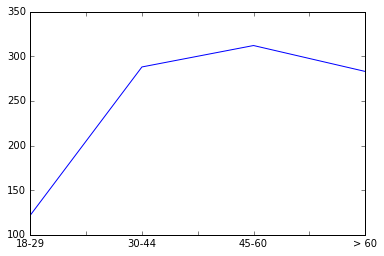

In [12]:
age = df.Age
print age.unique()
print age.value_counts()
age.value_counts().sort_index().plot()

In [13]:
income = df["Household Income"]
print income.unique()
print income.value_counts()

['$0 - $24,999' nan '$150,000+' '$25,000 - $49,999' '$100,000 - $149,999'
 '$50,000 - $99,999']
$50,000 - $99,999      314
$100,000 - $149,999    226
$150,000+              126
$25,000 - $49,999       99
$0 - $24,999            45
Name: Household Income, dtype: int64


In [18]:
vc = income[sleep_alone == "Never"].value_counts()
vc/vc.sum()

$50,000 - $99,999      0.379953
$100,000 - $149,999    0.277389
$150,000+              0.156177
$25,000 - $49,999      0.125874
$0 - $24,999           0.060606
Name: Household Income, dtype: float64

In [19]:
vc = income[sleep_alone == "Every night"].value_counts()
vc/vc.sum()

$50,000 - $99,999      0.378378
$100,000 - $149,999    0.288288
$25,000 - $49,999      0.153153
$150,000+              0.144144
$0 - $24,999           0.036036
Name: Household Income, dtype: float64

45-60    165
> 60     155
30-44    142
18-29     77
Name: Age, dtype: int64


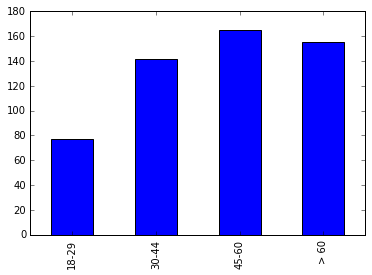

> 60     61
45-60    44
30-44    26
18-29     6
Name: Age, dtype: int64


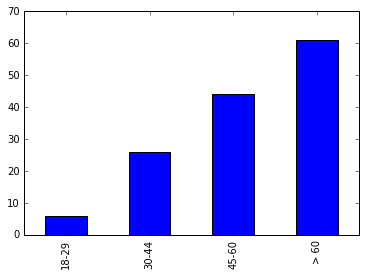

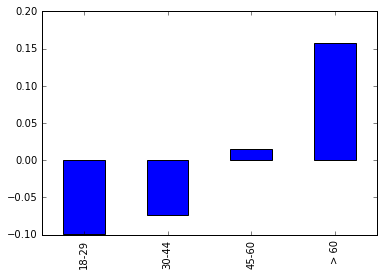

In [30]:
vc = age[sleep_alone == "Never"].value_counts()
vc1 = vc/vc.sum()
print vc
vc.sort_index().plot(kind='bar')
plt.show()
vc = age[sleep_alone == "Every night"].value_counts()
vc2 = vc/vc.sum()
print vc
vc.sort_index().plot(kind='bar')
plt.show()

(vc2-vc1).plot.bar()

In [26]:
age

1       18-29
2       18-29
3       18-29
4       18-29
5       18-29
6       18-29
7         NaN
8         NaN
9       45-60
10       > 60
11      18-29
12      30-44
13      30-44
14      30-44
15      30-44
16      30-44
17      30-44
18      30-44
19      30-44
20      30-44
21      18-29
22      30-44
23      30-44
24      30-44
25      18-29
26      30-44
27      30-44
28      18-29
29      30-44
30      30-44
        ...  
1064    18-29
1065     > 60
1066     > 60
1067    45-60
1068    30-44
1069    30-44
1070    45-60
1071    45-60
1072    18-29
1073     > 60
1074    45-60
1075    45-60
1076    30-44
1077    45-60
1078     > 60
1079    45-60
1080    30-44
1081     > 60
1082    45-60
1083      NaN
1084    45-60
1085    30-44
1086    30-44
1087    30-44
1088    18-29
1089    30-44
1090     > 60
1091    30-44
1092     > 60
1093    45-60
Name: Age, dtype: object

In [28]:
age_min_max = age.str.replace('> 60','60-80').str.split('-', expand=True).astype(float)
age_mean = age_min_max.mean(axis=1)
age_mean

1       23.5
2       23.5
3       23.5
4       23.5
5       23.5
6       23.5
7        NaN
8        NaN
9       52.5
10      70.0
11      23.5
12      37.0
13      37.0
14      37.0
15      37.0
16      37.0
17      37.0
18      37.0
19      37.0
20      37.0
21      23.5
22      37.0
23      37.0
24      37.0
25      23.5
26      37.0
27      37.0
28      23.5
29      37.0
30      37.0
        ... 
1064    23.5
1065    70.0
1066    70.0
1067    52.5
1068    37.0
1069    37.0
1070    52.5
1071    52.5
1072    23.5
1073    70.0
1074    52.5
1075    52.5
1076    37.0
1077    52.5
1078    70.0
1079    52.5
1080    37.0
1081    70.0
1082    52.5
1083     NaN
1084    52.5
1085    37.0
1086    37.0
1087    37.0
1088    23.5
1089    37.0
1090    70.0
1091    37.0
1092    70.0
1093    52.5
dtype: float64

In [29]:
print age_mean[sleep_alone == "Never"].mean()
print age_mean[sleep_alone == "Every night"].mean()

49.306122449
56.0802919708
